# Walki kotów dachowych

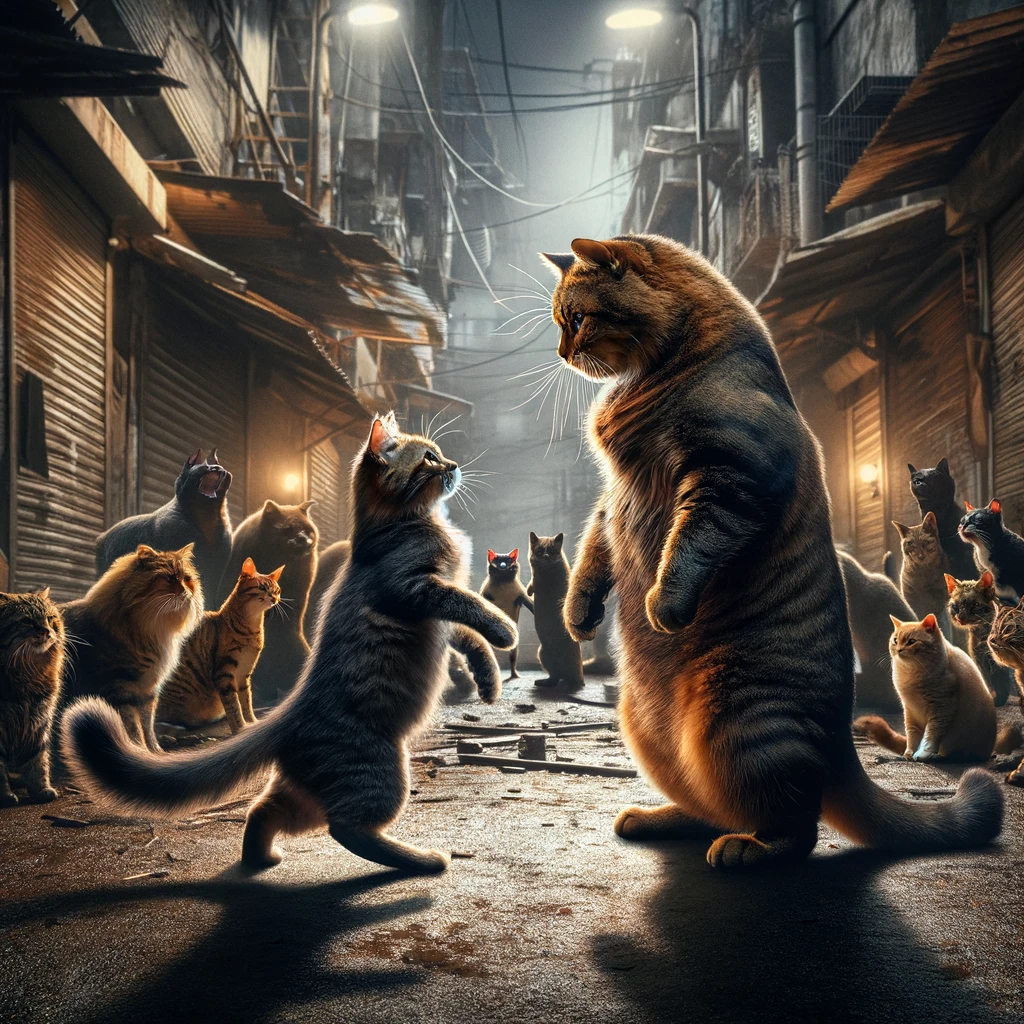

In [2]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [3]:
def get_data(n_samples):
  weight_losing = torch.randn(n_samples // 2) * 0.5 + 3.2
  weight_winning = torch.randn(n_samples // 2) * 0.5 + 4.8

  X = torch.cat([weight_losing, weight_winning])
  y = torch.cat([torch.zeros(n_samples // 2), torch.ones(n_samples // 2)])
  return X, y

In [4]:
X, y = get_data(1000)

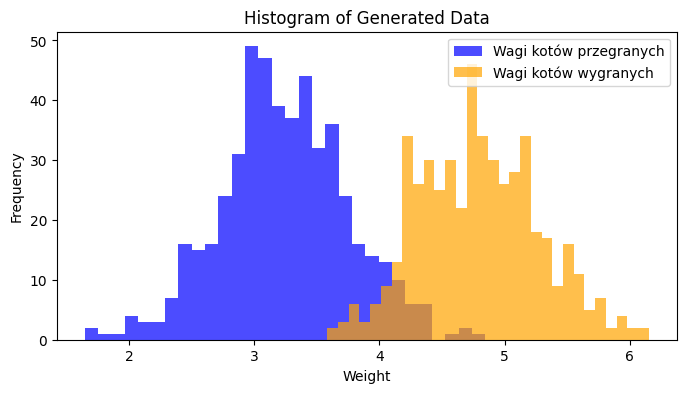

In [5]:
# Separate data based on labels
X_losing = X[y == 0]
X_winning = X[y == 1]

# Plotting the histogram with different colors for each label
plt.figure(figsize=(8, 4))
plt.hist(X_losing.numpy(), bins=30, alpha=0.7, color='blue', label='Wagi kotów przegranych')
plt.hist(X_winning.numpy(), bins=30, alpha=0.7, color='orange', label='Wagi kotów wygranych')
plt.title('Histogram of Generated Data')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [6]:
sorted(X.numpy())[:9]

[1.6499908,
 1.7494476,
 1.7705414,
 1.9547887,
 2.0307782,
 2.0538557,
 2.0582533,
 2.0732727,
 2.127911]

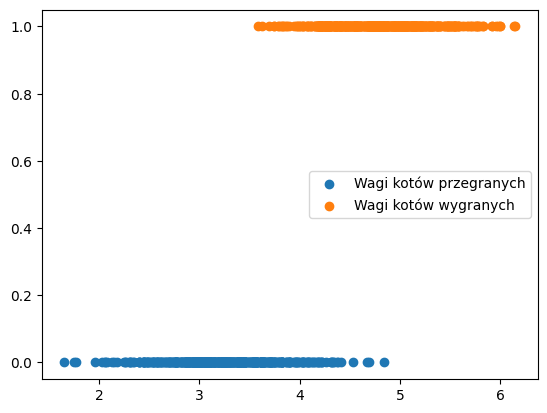

In [7]:


plt.scatter(X[y == 0], y[y == 0], label='Wagi kotów przegranych')
plt.scatter(X[y == 1], y[y == 1], label='Wagi kotów wygranych')
plt.legend()
plt.show()

/tmp/ipykernel_26378/2002689240.py:6: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


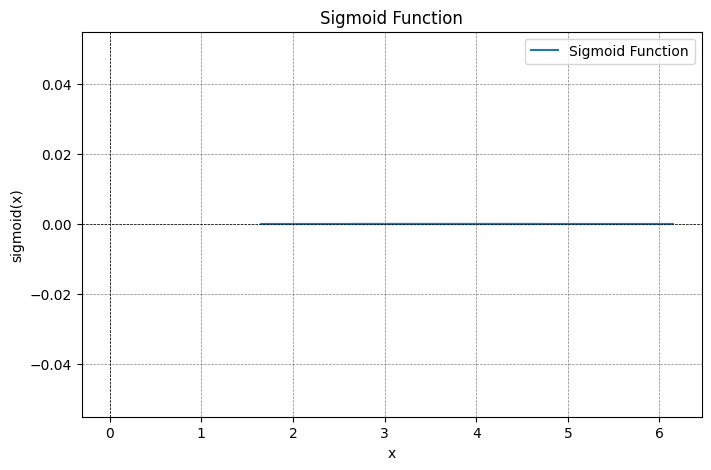

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Define the sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Calculate the corresponding y values using the sigmoid function

# Create the plot
plt.figure(figsize=(8, 5))

plt.plot(x, sigmoid( 44*(X - 9)), label='Sigmoid Function')

plt.title('Sigmoid Function')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.axhline(0, color='black',linewidth=0.5, linestyle='--')
plt.axvline(0, color='black',linewidth=0.5, linestyle='--')
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-1*x))

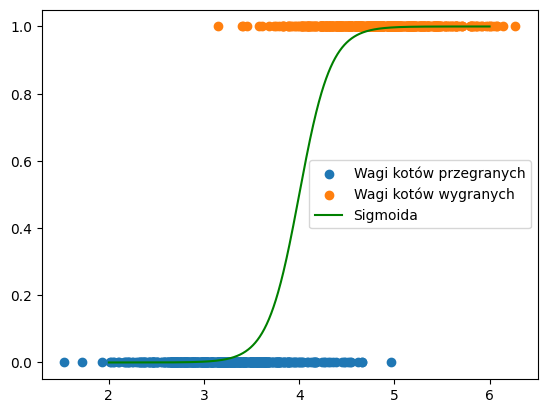

In [ ]:
x_lin = torch.linspace(2, 6, 1000)

plt.scatter(X[y == 0], y[y == 0], label='Wagi kotów przegranych')
plt.scatter(X[y == 1], y[y == 1], label='Wagi kotów wygranych')
plt.plot(x_lin, sigmoid(6 * (x_lin - 4)), c='green', label='Sigmoida')
plt.legend()
plt.show()

In [ ]:
def binary_cross_entropy_loss(y, probs, eps=1e-10):
  #return - (y * torch.log(probs + eps) + (1 - y) * torch.log(1 - probs + eps)).mean()
  return (( y - probs)**2).mean()
  #return (torch.abs( y - probs)).mean()

In [ ]:
class LogisticRegression(nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.a = nn.Parameter(torch.tensor([1.]))
    self.b = nn.Parameter(torch.tensor([0.]))

  def forward(self, X):
    z = self.a * X + self.b
    prob = sigmoid(z)
    return prob

In [ ]:
n_epochs = 30000
learning_rate = 1e-1

model = LogisticRegression()
optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate)

In [ ]:
for i in range(n_epochs):
  probs = model(X)
  #loss = binary_cross_entropy_loss(y, probs)
  loss = torch.nn.MSELoss()(y, probs)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 500 == 0:
    print(f'\rEpoch {i} Cross entropy {loss.item():.4f}\t', end="")

Epoch 29500 Cross entropy 0.0481	

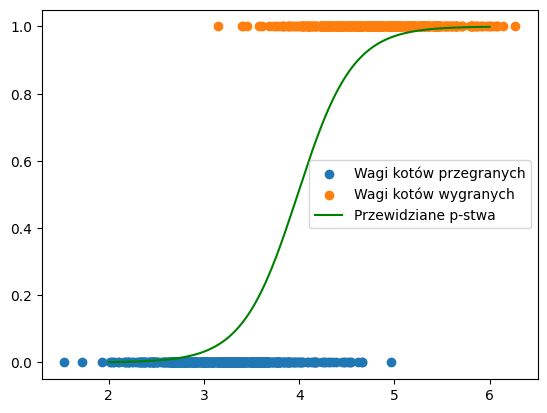

In [ ]:
with torch.no_grad():
  probs = model(x_lin)

plt.scatter(X[y == 0], y[y == 0], label='Wagi kotów przegranych')
plt.scatter(X[y == 1], y[y == 1], label='Wagi kotów wygranych')
plt.plot(x_lin, probs, c='green', label='Przewidziane p-stwa')
plt.legend()
plt.show()

In [ ]:
model.a, model.b, model.b /model.a

(Parameter containing:
 tensor([3.4581], requires_grad=True),
 Parameter containing:
 tensor([-13.7739], requires_grad=True),
 tensor([-3.9831], grad_fn=<DivBackward0>))